## Explore Hyperparameters Exercise - Solution

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def build_model( lr=0.001):
    model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
    ])
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model



4423680/4422102 [==============================] - 4s 1us/step


In [2]:
def train_model(model, epochs = 20):
    from tensorflow.keras.callbacks import EarlyStopping

    escbk = EarlyStopping(patience=2)
    history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels), callbacks=[escbk])
    return history

def benchmark(lr):
    print("learning rate", lr)
    model = build_model(lr)
    history = train_model(model)
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

    print('\nTest accuracy:', test_acc)
    
    # Get training and test loss histories
    training_loss = history.history['loss']
    test_loss = history.history['val_loss']
    
    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

 

    # Visualize loss history
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.ylim(0,5)
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    

### LR = 0.1 - Not Converging
Probably the high learning rate caused the optimizer to diverge from the gardient as the loss function stays high and fixed for both training data and validation (the model does not converge)

learning rate 0.1
Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 38.5764 - accuracy: 0.1019 - val_loss: 2.3226 - val_accuracy: 0.1000
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3149 - accuracy: 0.0991 - val_loss: 2.3152 - val_accuracy: 0.1000
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3154 - accuracy: 0.1019 - val_loss: 2.3154 - val_accuracy: 0.1000
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3156 - accuracy: 0.1017 - val_loss: 2.3133 - val_accuracy: 0.1000
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3152 - accuracy: 0.1024 - val_loss: 2.3245 - val_accuracy: 0.1000
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3157 - accuracy: 0.1009 - val_loss: 2.3215 - val_accuracy: 0.1000
313/313 - 1s - loss: 2.3215 - accuracy: 0.1000

Test accuracy: 0.10000000149011612


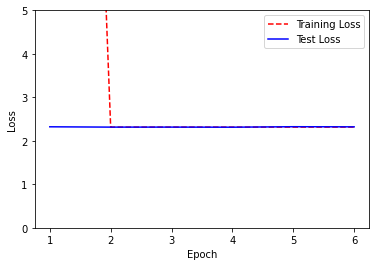

In [3]:
benchmark(0.1)

### LR = 0.01 - Overshooting
Overshooting is clearly observed in this example, the loss values are bouncing throuout the gardient missing all minimum points

learning rate 0.01
Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 5.1852 - accuracy: 0.3874 - val_loss: 1.8371 - val_accuracy: 0.2938
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1055 - accuracy: 0.1951 - val_loss: 2.4616 - val_accuracy: 0.1334
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2595 - accuracy: 0.1256 - val_loss: 2.2767 - val_accuracy: 0.1120
313/313 - 0s - loss: 2.2767 - accuracy: 0.1120

Test accuracy: 0.1120000034570694


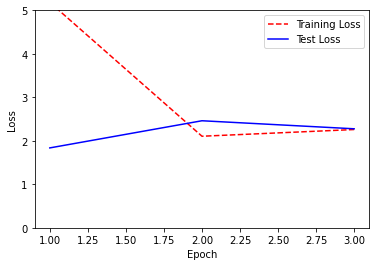

In [12]:
benchmark(0.01)

### LR = 0.001 - Good Learning Rate
We can see its seems like a good learning rate, the model converge to a minimum
> NOTE: You can see that arround epoch 6 the model gets too specific for the training data set (overfitting)

learning rate 0.001
Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 3.4861 - accuracy: 0.6670 - val_loss: 0.9042 - val_accuracy: 0.6749
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7534 - accuracy: 0.7197 - val_loss: 0.7457 - val_accuracy: 0.7279
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6503 - accuracy: 0.7573 - val_loss: 0.6267 - val_accuracy: 0.7568
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5963 - accuracy: 0.7839 - val_loss: 0.6833 - val_accuracy: 0.7417
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5847 - accuracy: 0.7888 - val_loss: 0.7141 - val_accuracy: 0.7207
313/313 - 0s - loss: 0.7141 - accuracy: 0.7207

Test accuracy: 0.7207000255584717


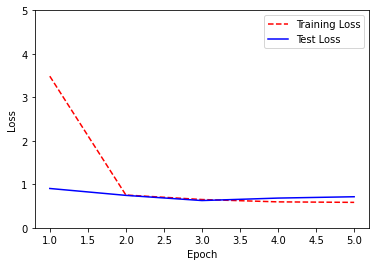

In [14]:
benchmark(0.001)

### LR = 0.0001 - Slow & Steady
Slow and steady learning rate, the model converges but it requires much more iterations then using LR=0.001

learning rate 0.0001
Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 10.6912 - accuracy: 0.7263 - val_loss: 5.7362 - val_accuracy: 0.7823
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 4.2727 - accuracy: 0.7936 - val_loss: 3.8143 - val_accuracy: 0.7828
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.7713 - accuracy: 0.8072 - val_loss: 2.9256 - val_accuracy: 0.7773
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9611 - accuracy: 0.8105 - val_loss: 2.0751 - val_accuracy: 0.8026
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3697 - accuracy: 0.8147 - val_loss: 1.3520 - val_accuracy: 0.7943
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7972 - accuracy: 0.7916 - val_loss: 0.9095 - val_accuracy: 0.7835
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5950 - accuracy: 0.8163 - val_loss: 

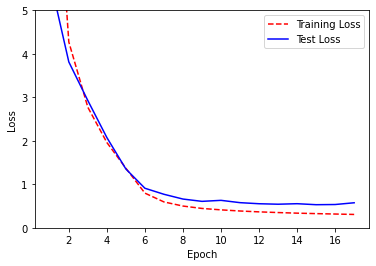

In [13]:
benchmark(0.0001)